# Gradient Descent - Boston Dataset

Boston dataset is one of the datasets available in sklearn.

You are given a Training dataset csv file with X train and Y train data. As studied in lecture, your task is to come up with Gradient Descent algorithm and thus predictions for the test dataset given.
Your task is to:

1. Code Gradient Descent for N features and come with predictions.
2. Try and test with various combinations of learning rates and number of iterations.
3. Try using Feature Scaling, and see if it helps you in getting better results. 

Read Instructions carefully -

1. Use Gradient Descent as a training algorithm and submit results predicted.
2. Files are in csv format, you can use genfromtxt function in numpy to load data from csv file. Similarly you can use savetxt function to save data into a file.
3. Submit a csv file with only predictions for X test data. File name should not have spaces. File should not have any headers and should only have one column i.e. predictions. Also predictions shouldn't be in exponential form. 
4. Your score is based on coefficient of determination.

### Importing libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = np.genfromtxt('training_boston_x_y_train.csv',delimiter=',')
test_data = np.genfromtxt("test_boston_x_test.csv",delimiter=',')

In [4]:
train_data.shape,test_data.shape

((379, 14), (127, 13))

### Basic EDA and Feature scaling

In [5]:
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.407850,-0.487722,-1.266023,-0.272599,-0.576134,1.239974,0.840122,-0.520264,-0.752922,-1.278354,-0.303094,0.410571,-1.097990,37.9
1,-0.407374,-0.487722,0.247057,-0.272599,-1.016689,0.001946,-0.838337,0.336351,-0.523001,-0.060801,0.113032,0.291169,-0.520474,21.4
2,0.125179,-0.487722,1.015999,-0.272599,1.367490,-0.439699,0.687212,-0.577309,1.661245,1.530926,0.806576,-3.795795,0.891076,12.7
3,0.028304,-0.487722,1.015999,-0.272599,1.859875,-0.047918,0.801005,-0.712836,1.661245,1.530926,0.806576,-0.066050,0.215438,19.9
4,-0.412408,-0.487722,-0.969827,-0.272599,-0.913029,-0.384137,-0.834781,0.300508,-0.752922,-0.957633,0.020560,0.431074,0.029007,22.5


In [6]:
# Training and testing data are already scaled.
# Running Gradient descent

In [7]:
def GD(data, learning_rate, iterations):
    c  = 0
    m = [0]*13 # M is an array of features == x
    M = len(data)
    costs = []
    for i in range(iterations):
        
        m,c = step_gradient(data,learning_rate, m,c)
        cost_achieved = cost(data,m,c)
        costs.append(cost_achieved)
    return m,c,costs

def run():
    data = np.genfromtxt('training_boston_x_y_train.csv',delimiter=',')
    learning_rate = 0.08
    iterations = 350
    ans,c,costs = GD(data, learning_rate, iterations)
    for i in range(len(ans)):
        print("m{}".format(i),":",ans[i])
    print("c:",c)
    return ans,c,costs

In [8]:
def step_gradient(data, learning_rate, m,c):
    M = len(data)
    
    slopes = [0]*13
    c_slope = 0
    # Iterating over M rows
    for i in range(M):
        
        x = data[i,:13]
        #x = preprocessing.minmax_scale(x,feature_range=(-1,1))
        y = data[i,13]
        
        
        for j in range(len(x)):
            slopes[j] += (-2/M)*(y-add(x,m)-c)*x[j]
        c_slope += (-2/M)*(y-add(x,m)-c)
    for i in range(len(m)):
        m[i] = m[i] - learning_rate*slopes[i]
    c = c - learning_rate*c_slope
    return m,c

def cost(data,m,c):
    total = 0
    
    M = len(data)
    for i in range(M):
        x = data[i,:13]
        #x = preprocessing.minmax_scale(x,feature_range=(-1,1))
        y = data[i,13]
        
        
        total += (1/M)*((y - add(x,m)-c)**2)
    return total


In [9]:
def add(x,m):
    sum = 0
    for i in range(len(x)):
        sum += x[i]*m[i]
    return sum

In [10]:
m,c,costs = run()

m0 : -0.9356269363361551
m1 : 0.7341887265288941
m2 : -0.008146784719337025
m3 : 0.783063604176345
m4 : -2.171661767594316
m5 : 2.3566109269527273
m6 : 0.12111799704862937
m7 : -2.953602045740796
m8 : 2.4909637117972028
m9 : -1.6536670086349439
m10 : -2.2498893185635658
m11 : 0.5875124926369985
m12 : -4.262572937374763
c: 22.6773900430416


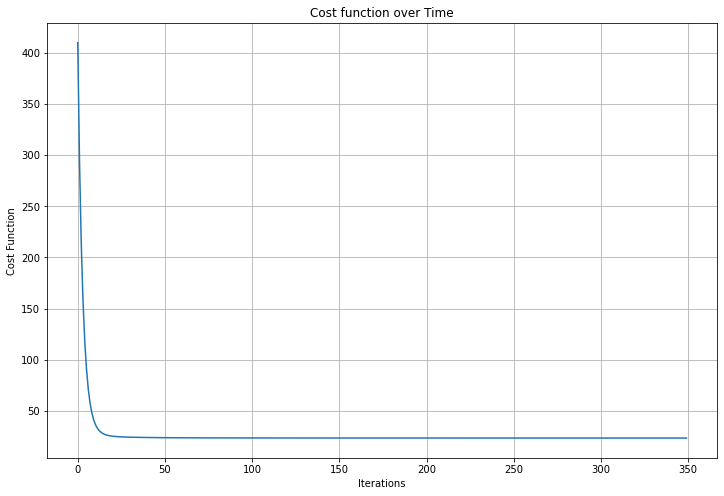

In [11]:
plt.rcParams['figure.figsize']=(12,8)
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost function over Time")
plt.grid()
plt.show()

### Y predictions

In [12]:
test_data = np.genfromtxt("test_boston_x_test.csv",delimiter=',')

In [13]:
# Y = mX + c
y_preds = []
M = len(test_data)
for i in range(M):
    y_pred = np.sum(m*test_data[i]) + c
    y_preds.append(y_pred)

In [14]:
y_preds

[12.428792067424178,
 29.016235642855605,
 22.3741508099656,
 24.46366487272192,
 20.62804250622467,
 2.733340693575066,
 30.375121537243043,
 24.854384726800774,
 18.664253917693767,
 23.539726441724568,
 24.11349154219102,
 17.717958744044815,
 17.4715656187469,
 21.666701375773098,
 42.32087959834304,
 23.862953577628403,
 24.475133196053807,
 27.5570044153568,
 20.248227409003345,
 31.16942767192288,
 23.810497782419148,
 25.00398675420182,
 33.954076701082485,
 36.42837561978644,
 32.052009097761214,
 16.701664715585792,
 23.477572360491777,
 32.96486506448782,
 25.16280253499677,
 33.7112803433356,
 16.893012005369222,
 26.04417523106336,
 23.27509192689859,
 25.47445032142335,
 15.008702795957085,
 29.593776763152206,
 26.248358395671698,
 20.39616005534095,
 24.419975434351873,
 9.448766026619957,
 8.371691011584499,
 29.007516191507364,
 29.598856749743575,
 19.76625723013916,
 20.365569416213198,
 3.1392019218943226,
 39.52230127747693,
 25.71766080255715,
 30.348201539292695

In [233]:
ans = np.savetxt('ans.csv',y_preds)